# Plotting Basic Results

We will first show the RMSE and correlation-coefficients of different methods.

In [1]:
import pandas as pd
import numpy as np

# CWB station info
stdinfo = pd.read_csv('../examples/data/CWB_station_list_cleaned_20191204.csv')
stdinfo.head()

,id,name,elevation,lon,lat,city,address,start_date,end_date
0,466850,五分山雷達站,756.0,121.7812,25.0712,新北市,瑞芳區靜安路四段1巷1號,1988/07/01,NaN
1,466880,板橋,9.7,121.4420,24.9976,新北市,板橋區大觀路二段265巷62號,1972/03/01,NaN
2,466900,淡水,19.0,121.4489,25.1649,新北市,淡水區中正東路42巷6號,1942/01/01,NaN
3,466910,鞍部,825.8,121.5297,25.1826,臺北市,北投區陽明山竹子湖路111號,1937/01/01,NaN
4,466920,臺北,6.3,121.5149,25.0377,臺北市,中正區公園路64號,1896/01/01,NaN


In [5]:
# CWB QPE
evcwb = pd.read_csv('cwb_qpe_eval_2016_wo_negatives.csv')
print(evcwb.head())
# Our QPE
evvtp = pd.read_csv('enclr_test.csv')
print(evvtp.head())

       id  y_true_mean  y_true_var  y_pred_mean  y_pred_var      rmse  \
0  466880     0.361950    4.647973     0.446484    7.864563  1.773295   
1  466910     0.587232    4.442127     0.337834    3.207659  1.826769   
2  466920     0.307130    2.673787     0.384754    6.267502  1.970767   
3  466930     0.514291    4.228280     0.383654    3.853853  1.940486   
4  466940     0.471768    3.936171     0.139258    0.699974  1.739684   

       corr  
0  0.775279  
1  0.579438  
2  0.618383  
3  0.536728  
4  0.518058  
       id  y_true_mean  y_true_var  y_pred_mean  y_pred_var      rmse  \
0  466880     0.742498    7.035036     0.795455    2.771246  2.216409   
1  466910     0.820665    4.641497     0.923516    2.423912  1.724464   
2  466920     0.665499    5.480805     0.733782    2.157733  2.149729   
3  466930     0.796765    5.701284     0.891879    3.243342  1.910471   
4  466940     0.765409    6.957750     0.774647    1.218314  2.339535   

       corr  
0  0.554025  
1  0.61115

In [6]:
# Prepare data for visualization
cwb = pd.merge(evcwb.loc[:,['id','rmse','corr']], stdinfo.loc[:,['id','elevation','lon','lat']], on='id')
print(cwb.head())
vtp = pd.merge(evvtp.loc[:,['id','rmse','corr']], stdinfo.loc[:,['id','elevation','lon','lat']], on='id')
print(vtp.head())

       id      rmse      corr  elevation       lon      lat
0  466880  1.773295  0.775279        9.7  121.4420  24.9976
1  466910  1.826769  0.579438      825.8  121.5297  25.1826
2  466920  1.970767  0.618383        6.3  121.5149  25.0377
3  466930  1.940486  0.536728      607.1  121.5445  25.1621
4  466940  1.739684  0.518058       26.7  121.7405  25.1333
       id      rmse      corr  elevation       lon      lat
0  466880  2.216409  0.554025        9.7  121.4420  24.9976
1  466910  1.724464  0.611159      825.8  121.5297  25.1826
2  466920  2.149729  0.438845        6.3  121.5149  25.0377
3  466930  1.910471  0.616379      607.1  121.5445  25.1621
4  466940  2.339535  0.463284       26.7  121.7405  25.1333


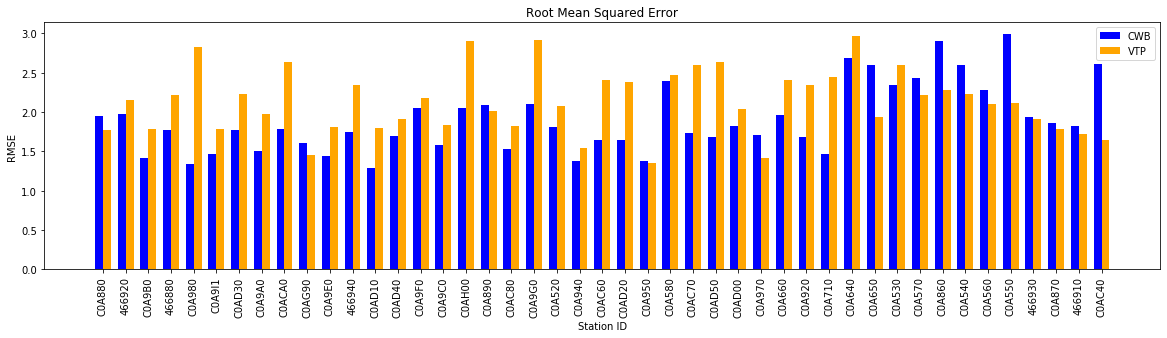

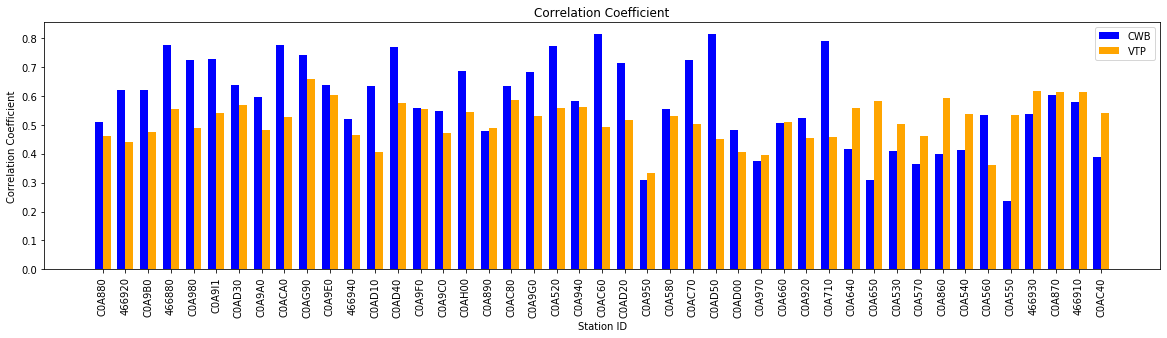

In [31]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt

cwb_el = cwb.sort_values('elevation').reset_index(drop=True)
vtp_el = vtp.sort_values('elevation').reset_index(drop=True)

x = np.arange(len(cwb_el['id']))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.title('Root Mean Squared Error')
plt.ylabel('RMSE')
plt.xlabel('Station ID')
plt.bar(x - width/2, cwb_el['rmse'], width, color='blue', label='CWB')
plt.bar(x + width/2, vtp_el['rmse'], width, color='orange', label='VTP')
plt.xticks(x, cwb_el['id'], fontsize=10, rotation='vertical')
plt.legend()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,1,2)
plt.title('Correlation Coefficient')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Station ID')
plt.bar(x - width/2, cwb_el['corr'], width, color='blue', label='CWB')
plt.bar(x + width/2, vtp_el['corr'], width, color='orange', label='VTP')
plt.xticks(x, cwb_el['id'], fontsize=10, rotation='vertical')
plt.legend()
plt.show()